In [1]:
#import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv('RealEstates.csv')

In [3]:
df.sample(10)

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
2991,2991,81248.19697,7.939003735,?,NaN,48922.52140,Rs26256.759106878566,52177 Benjamin Avenue Apt. 465\nPort Aprilstad...,NaN
129,129,67504.17846,5.329798509,?,NaN,37441.12054,Rs11868.167324238564,"67610 Smith Knolls\nBrendaberg, MA 55188-7972",NaN
4260,4260,76956.49145,7.200016,?,NaN,23867.32598,"$1,203,623.84","3949 Montgomery Corners\nPort Keithview, AZ 44...",NaN
1824,1824,71902.80788,5.618340136,?,NaN,42200.26209,"$1,312,063.76","582 Howell Crescent\nBushside, SC 26412",NaN
459,459,59729.25260,7.560599416,?,NaN,31202.18742,Rs15955.835823553996,43128 Kevin Lane Suite 880\nLake Brookeborough...,NaN
1597,1597,39294.03652,5.928585443,5.960675668,4.36,43183.51610,Rs10415.16615774025,"829 Bonnie Rue Suite 653\nYorkville, MP 35797-...",NaN
3048,3048,71601.64106,6.066999487,?,NaN,34787.46537,"$1,289,201.39","2334 Morgan Highway Apt. 273\nBrownland, SC 27143",NaN
2237,2237,80379.05536,7.070930483,4.407346082,4.12,54143.32870,Rs21158.533261749017,"5992 Sanders Freeway\nOrozcoville, IL 93327-1981",NaN
1780,1780,57824.96715,5.482703956,7.250184907,3.09,45555.33649,"$1,015,233.03","171 Krista Motorway\nGilbertchester, IN 45261-...",NaN
4550,4550,60553.24400,5.527459817,7.315695461,6.43,37277.88702,"$1,086,829.25","373 Chandler Loaf Suite 465\nBaldwinfurt, AL 9...",0.054753


<AxesSubplot:>

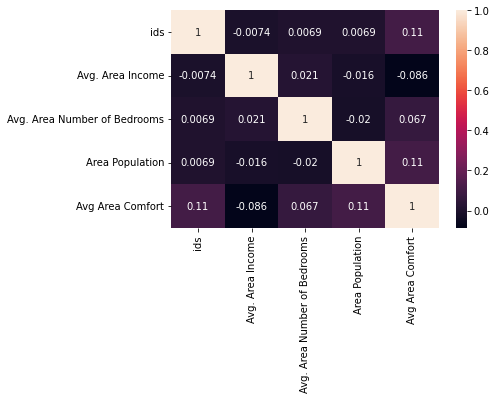

In [4]:
#check correlation input to output
sns.heatmap(df.corr(),annot=True)

In [5]:
#check null value
df.isnull().sum()

ids                                0
Avg. Area Income                   0
Avg. Area House Age                0
Avg. Area Number of Rooms          0
Avg. Area Number of Bedrooms    1667
Area Population                    0
Price                              0
Address                            0
Avg Area Comfort                4800
dtype: int64

<AxesSubplot:>

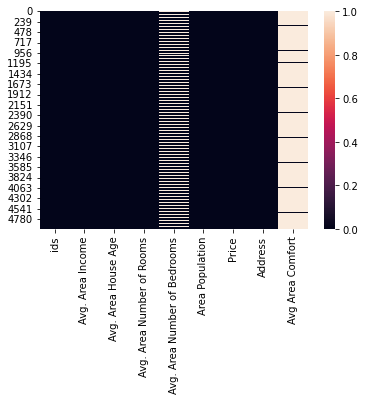

In [6]:
#visulize null value
sns.heatmap(df.isnull())

In [7]:
#replace null value Avg area number of bedrooms column
df["Avg. Area Number of Bedrooms"].replace("?",np.nan,inplace=True)

In [8]:
#check input datatype AVG Area number of bedrooms 
df['Avg. Area Number of Bedrooms'].dtypes

dtype('float64')

In [9]:
#check % null value
df["Avg. Area Number of Bedrooms"].isnull().sum()*100/df.shape[0]

33.34

In [10]:
#fill null value use mean 
m=df["Avg. Area Number of Bedrooms"].mean()
df["Avg. Area Number of Bedrooms"].fillna(m,inplace=True)
df.isnull().sum()

ids                                0
Avg. Area Income                   0
Avg. Area House Age                0
Avg. Area Number of Rooms          0
Avg. Area Number of Bedrooms       0
Area Population                    0
Price                              0
Address                            0
Avg Area Comfort                4800
dtype: int64

In [11]:
#check null value input dataset Avg Area Compfort
df["Avg Area Comfort"].replace(" ",np.nan,inplace=True)

In [12]:
#check %
df["Avg Area Comfort"].isnull().sum()*100/df.shape[0]

96.0

In [13]:
#remove Ava area comfort input parmanent
df.drop("Avg Area Comfort",axis=1,inplace=True)

In [14]:
df.isnull().sum()

ids                             0
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<AxesSubplot:>

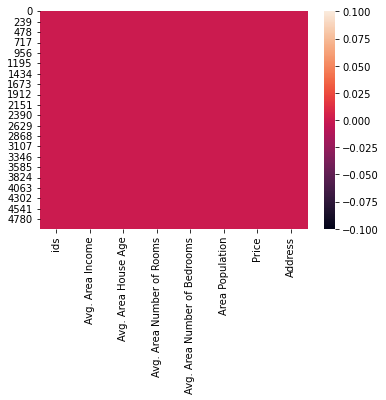

In [15]:
#visulize null value
sns.heatmap(df.isnull())

In [16]:
#replace dollar to rupess
df['Price']=df['Price'].str.replace(",","")

In [17]:
#create function
def cur_cn(x):
    if "Rs" in x:
        x=x.replace("Rs","")
        return float(x)*75
    elif "$" in x:
        x=x.replace("$","")
        return float(x)
    else:
        return float(x)


In [18]:
df['Price']=df['Price'].map(cur_cn)

In [19]:
#now check datatypes
df.dtypes

ids                               int64
Avg. Area Income                float64
Avg. Area House Age              object
Avg. Area Number of Rooms        object
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [20]:
#Avg area number of room object type data check null value
df['Avg. Area Number of Rooms'].value_counts()

?              1667
6.672181063       1
7.219983523       1
8.026912028       1
6.891980329       1
               ... 
8.246621014       1
6.178535053       1
6.541375695       1
4.43037246        1
6.792336104       1
Name: Avg. Area Number of Rooms, Length: 3334, dtype: int64

In [21]:
#replace null value
df['Avg. Area Number of Rooms'].replace('?',np.nan,inplace=True)

In [22]:
#check %null value
df['Avg. Area Number of Rooms'].isnull().sum()*100/df.shape[0]

33.34

<AxesSubplot:>

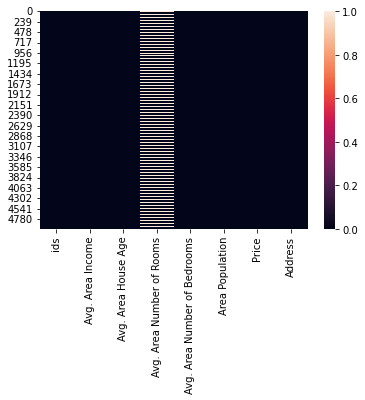

In [23]:
#visulize null value
sns.heatmap(df.isnull())

In [24]:
#change datatype object to number means float
df['Avg. Area Number of Rooms']=df['Avg. Area Number of Rooms'].astype("float")

In [25]:
#check datatype avg area number of rooms columns
df['Avg. Area Number of Rooms'].dtypes

dtype('float64')

In [26]:
#fill null value 
m=df['Avg. Area Number of Rooms'].mean()
df['Avg. Area Number of Rooms'].fillna(m,inplace=True)
df.isnull().sum()

ids                             0
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<AxesSubplot:>

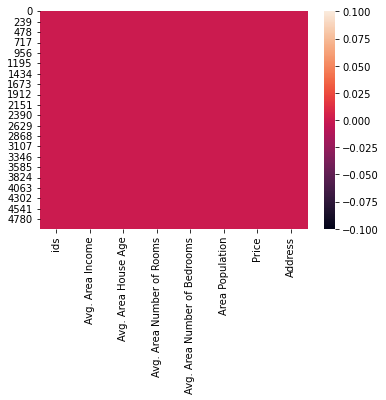

In [27]:
#visulize null value
sns.heatmap(df.isnull())

In [28]:
#check datatype
df.dtypes

ids                               int64
Avg. Area Income                float64
Avg. Area House Age              object
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [29]:
#check area house age object type data
df['Avg. Area House Age'].unique()

array(['missing', '6.002899808', '5.86588984', ..., '7.250590615',
       '5.534388416', '5.992305307'], dtype=object)

In [30]:
#found null value missing
#replace null value
df['Avg. Area House Age'].replace('missing',np.nan,inplace=True)

<AxesSubplot:>

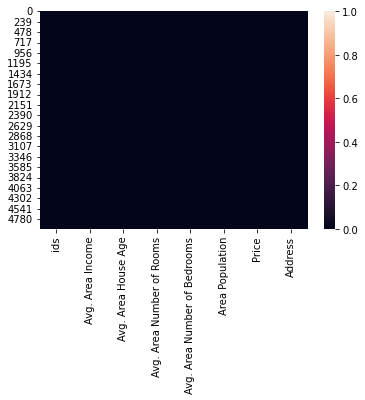

In [31]:
sns.heatmap(df.isnull())

In [32]:
df['Avg. Area House Age'].isnull().sum()*100/df.shape[0]

0.1

In [33]:
#change datatype object to number means float
df['Avg. Area House Age']=df['Avg. Area House Age'].astype("float")

In [34]:
#fill null value 
n=df['Avg. Area House Age'].mean()
df['Avg. Area House Age'].fillna(n,inplace=True)
df.isnull().sum()

ids                             0
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [35]:
df.dtypes

ids                               int64
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [36]:
#remove id columns parmanent
df.drop('ids',axis=1,inplace=True)

In [37]:
#drop address columns paramanent
df.drop('Address',axis=1,inplace=True)

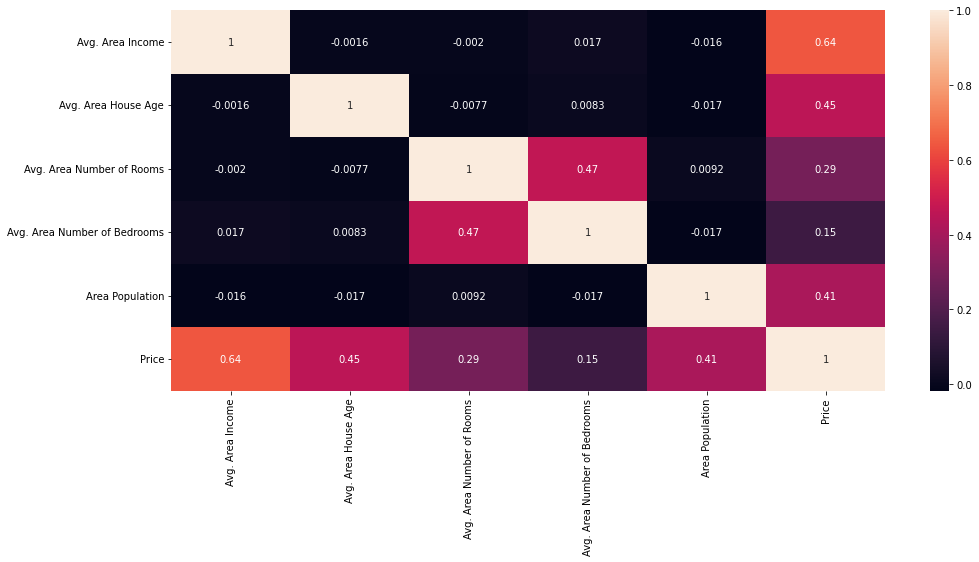

In [38]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

<AxesSubplot:>

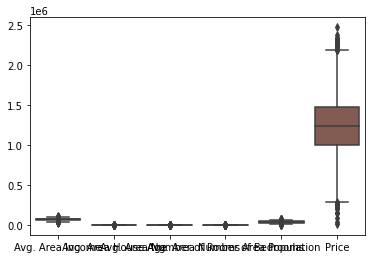

In [40]:
#check outlier in columns
sns.boxplot(data=df)

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Count'>

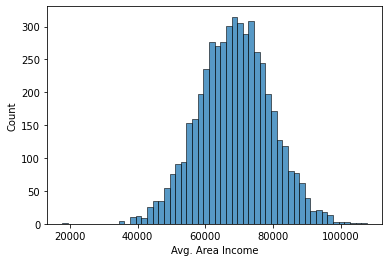

In [41]:
#check skewness avg area income
sns.histplot(df['Avg. Area Income'])

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

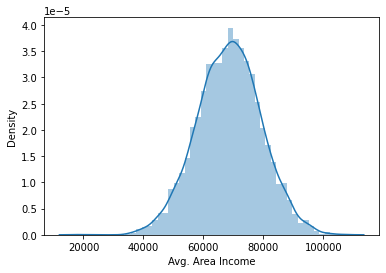

In [42]:
sns.distplot(df['Avg. Area Income'])

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Count'>

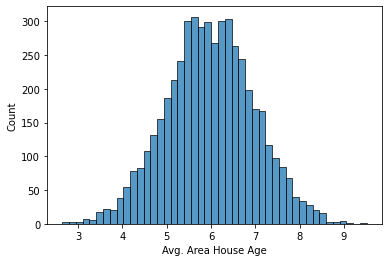

In [43]:
#check skewness
sns.histplot(df['Avg. Area House Age'])

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Density'>

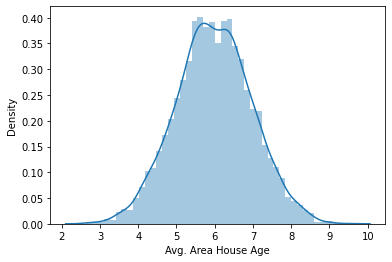

In [44]:
sns.distplot(df['Avg. Area House Age'])

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Count'>

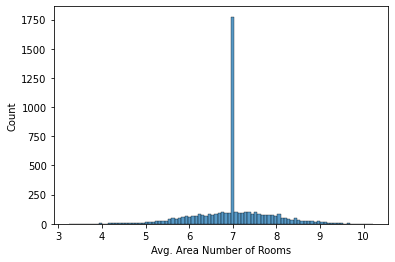

In [45]:
#check skewness
sns.histplot(df['Avg. Area Number of Rooms'])

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Density'>

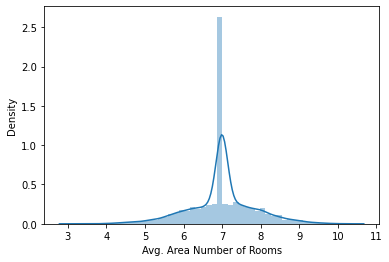

In [46]:
sns.distplot(df['Avg. Area Number of Rooms'])

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Count'>

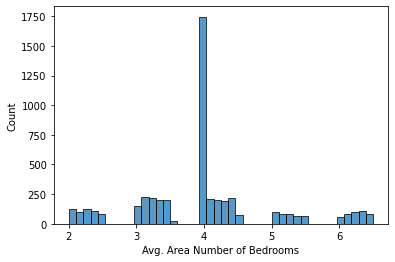

In [47]:
#check skewness
sns.histplot(df['Avg. Area Number of Bedrooms'])

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Density'>

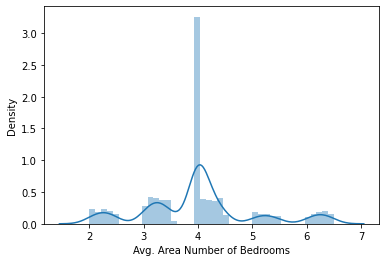

In [48]:
sns.distplot(df['Avg. Area Number of Bedrooms'])

<AxesSubplot:xlabel='Area Population', ylabel='Count'>

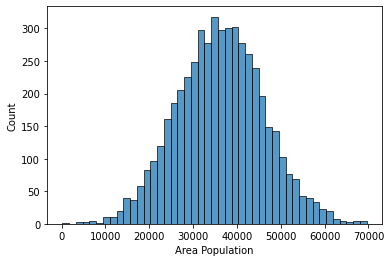

In [49]:
#check skewness
sns.histplot(df['Area Population'])

<AxesSubplot:xlabel='Area Population', ylabel='Density'>

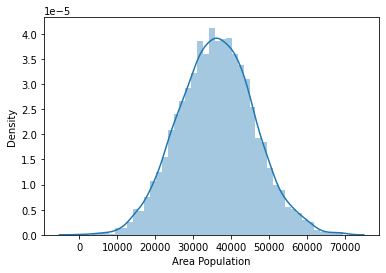

In [50]:
sns.distplot(df['Area Population'])

In [51]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
2025,38139.91904,5.577267,6.994414,3.998083,45899.73840,7.237501e+05
776,67282.57297,5.997033,7.746836,4.440000,42768.91230,1.481147e+06
2978,78186.23924,5.838064,5.133466,4.170000,49617.73142,1.526370e+06
4440,44710.18346,5.409128,6.994414,3.998083,56584.41380,1.048801e+06
2411,72752.21639,5.203791,5.577942,2.030000,29034.31996,6.922295e+05


In [52]:
#select input and output
x=df.drop('Price',axis=1)
y=df['Price']

In [53]:
#train the model
from sklearn.model_selection import train_test_split

In [54]:
#train model 30% data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [55]:
#scaling column
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)    

In [56]:
#check traing data
print(x_train)

[[-0.85963105 -1.21403598  0.67568531  0.31347257 -0.49946783]
 [ 0.29135867 -1.07852098  0.27161604  0.99807137  0.31239556]
 [-1.13688613 -0.55227719 -0.57128429 -0.85729058  0.14513856]
 ...
 [ 1.08019808  0.46569475 -0.60260961 -1.49228076 -0.9663989 ]
 [ 0.40820328 -0.76664439 -0.15268582  0.21425536  0.31939534]
 [-0.14387552 -0.76651547  0.21344221  1.24611441 -1.11196456]]


In [57]:
#train model with the help of linear regression
from sklearn.linear_model import LinearRegression

In [58]:
#create object of linear rigression class
lr=LinearRegression()

In [59]:
#train the model 70% data 
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
#check slope/coefficient and intercept
lr.coef_
lr.intercept_

1232402.8065308023

In [61]:
#test the model 30% data
y_pred=lr.predict(x_test)

In [62]:
#create dictnory
dic={"Actual output ":y_test,"Predicted output":y_pred}
df1=pd.DataFrame(dic)
df1.sample(10)

,Actual output,Predicted output
3535,6.276504e+05,6.200980e+05
1540,1.485418e+06,1.666383e+06
1375,1.333865e+06,1.334477e+06
102,1.783535e+06,1.860631e+06
2903,6.993233e+05,9.041087e+05
3984,1.729392e+06,1.702081e+06
2343,1.553854e+06,1.427724e+06
3639,1.028651e+06,1.284554e+06
1533,1.405400e+06,1.331279e+06
1156,1.535565e+06,1.409783e+06


In [63]:
#find mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

15083199483.957525

In [64]:
#find root mean squared error
rmse=np.sqrt(mse)
rmse

122813.67791886018

In [65]:
#find r2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2score:",score)

R2score: 0.8810911800821554
